### Mathematical transformations (Will Normally distribute your data if applied)
1. Log transform
2. Reciprocal transform
3. Power transform (square / sqrt)
4. Box-Cox transform
5. Yeo-Johnson transform




### Function transformer in sklearn
1. Function transformer
    * Log tranform
    * Reciprocal transform
    * Sq/sqrt transform
    * Custom transform
2. Power transformer
    * Box-Cox transform
    * Yeo-Johnson transform
3. Quantitle transformer

##### Distplot and QQ plot can be used to determine wether the data is normally distributed or not
<img src="https://miro.medium.com/v2/format:webp/0*lsbu809F5gOZrrKX">

Log transform :-
1. In log transform we apply log on the numerical values
2. Helps bring distant values in scale
3. It is best suited for right skewed data, as it helps normalize it

Reciprocal transform :-
1. In it we apply reciprocal(1/x) on the numerical values
2. Bigger values get converted into smaller values and vice versa

Square transform :-
1. In it we apply square(x^2) on the numerical values
2. Best suited for left skewed data

Sqrt transform :-
1. In it we apply square root(√x) on the numerical values


## Loading dataset

In [2]:
import pandas as pd
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.sample(4)

,Survived,Age,Fare
385,0,18.0,73.5000
697,1,NaN,7.7333
424,0,18.0,20.2125
647,1,56.0,35.5000


In [3]:
# Checking missing values :-
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [5]:
# Filling missing values in age through mean()
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.isnull().sum()

/tmp/ipython-input-814046907.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


,0
Survived,0
Age,0
Fare,0


## Train test split

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
Y = df['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Visulaizing the distribution of age and fare

/tmp/ipython-input-3612013747.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


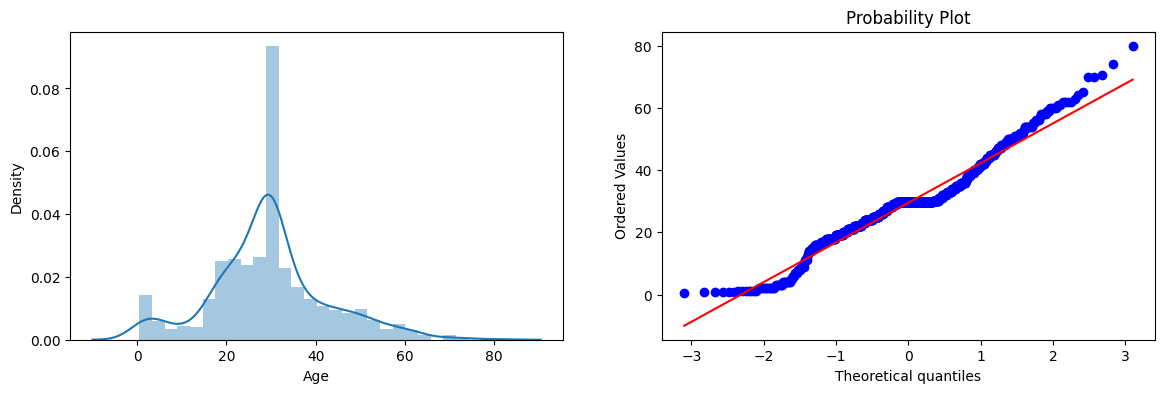

In [11]:
# Distplot and QQ plot of AGE

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
sns.distplot(X_train['Age'])

plt.subplot(1, 2, 2)
stats.probplot(X_train['Age'], dist="norm", plot=plt)

plt.show()

/tmp/ipython-input-141078801.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


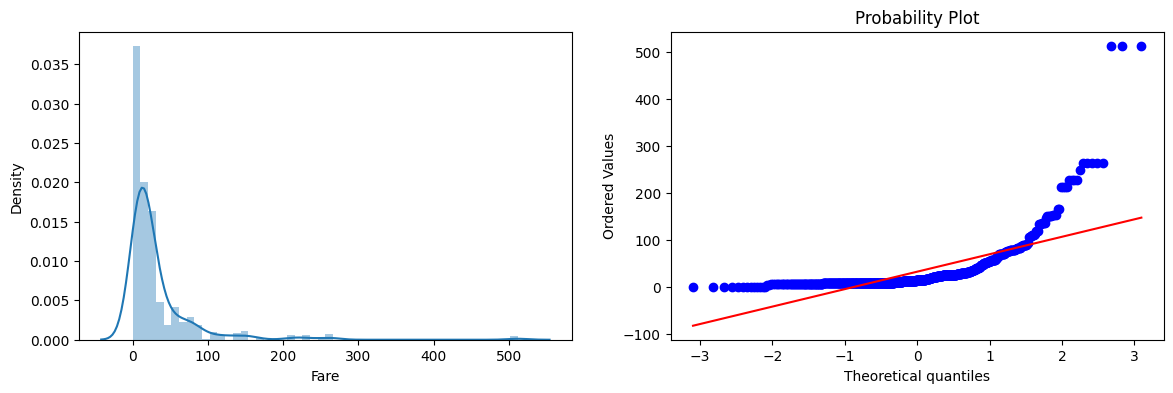

In [12]:
# Distplot and QQ plot of Fare

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
sns.distplot(X_train['Fare'])

plt.subplot(1, 2, 2)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)

plt.show()

## Applying logistic regression and decision tree before function transformer

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
dt = DecisionTreeClassifier()

lr.fit(X_train, Y_train)
dt.fit(X_train, Y_train)

y_pred = lr.predict(X_test)
y_pred1 = dt.predict(X_test)

print("Accuracy LR",accuracy_score(Y_test,y_pred))
print("Accuracy DT",accuracy_score(Y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.664804469273743


## Applying log transform

In [17]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# log1p -> adds 1 to the values and then takes log (to handle values whose value is 0)
trf = FunctionTransformer(func=np.log1p)

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

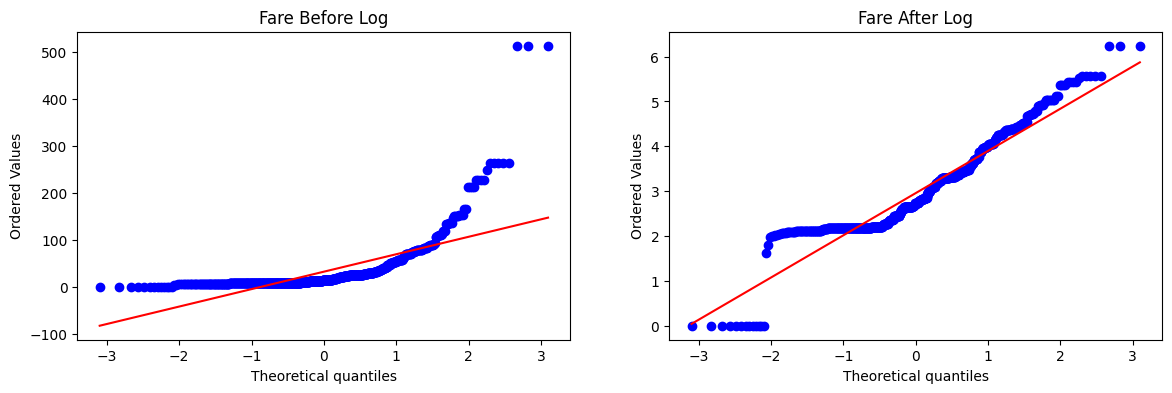

In [18]:
# Plotting QQ plot of Fare before and after log transform
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

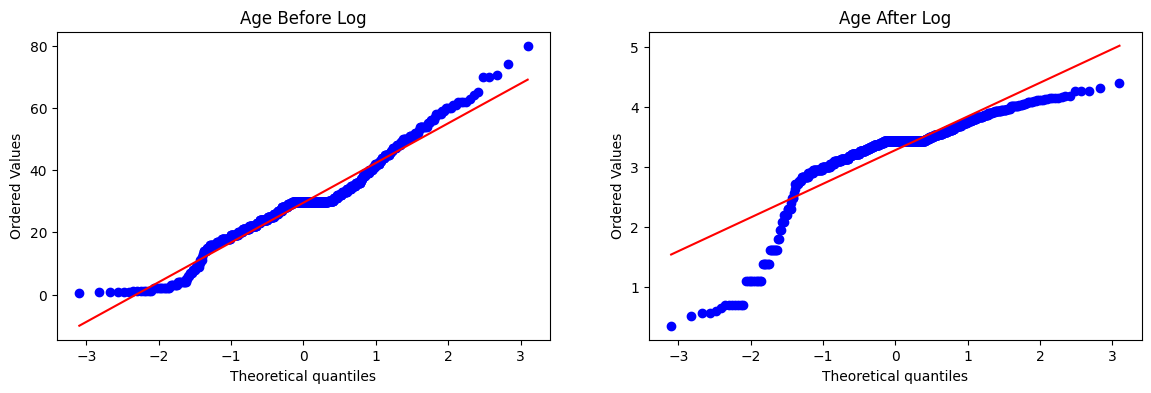

In [20]:
# Plotting QQ plot of Age before and after log transform
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [21]:
# As we can see log transform didn't work will in Age, then we will not apply log transform in it
from sklearn.compose import ColumnTransformer

trf = ColumnTransformer([
    ('log', 'passthrough', ['Fare'])
], remainder='passthrough')

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

##Applying logistic regression and decision tree before function transformer

In [25]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()

lr.fit(X_train_transformed, Y_train)
dt.fit(X_train_transformed, Y_train)

y_pred = lr.predict(X_test_transformed)
y_pred1 = dt.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(Y_test,y_pred))
print("Accuracy DT",accuracy_score(Y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6927374301675978


In [26]:
# Validating results through cross validation
from sklearn.model_selection import cross_val_score
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,Y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,Y,scoring='accuracy',cv=10)))

LR 0.6589013732833957
DT 0.6588264669163545


## Creating a sample apply_transform for Fare

In [27]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6195131086142323


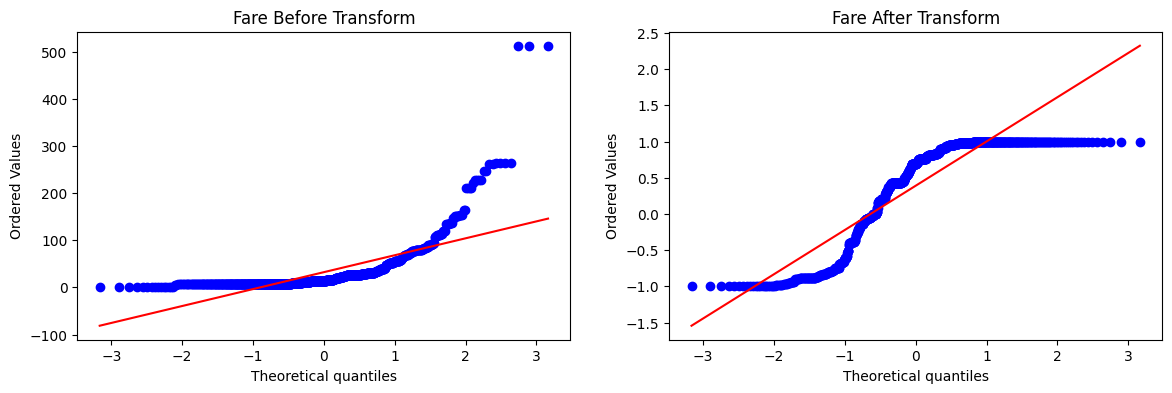

In [28]:
apply_transform(np.sin)

Accuracy 0.6431335830212235


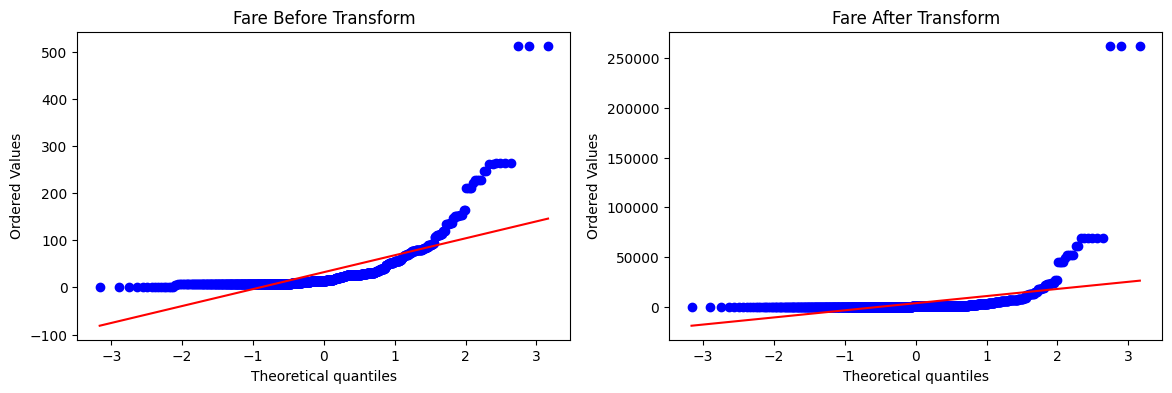

In [30]:
apply_transform(lambda x:x**2)

Accuracy 0.6262796504369538


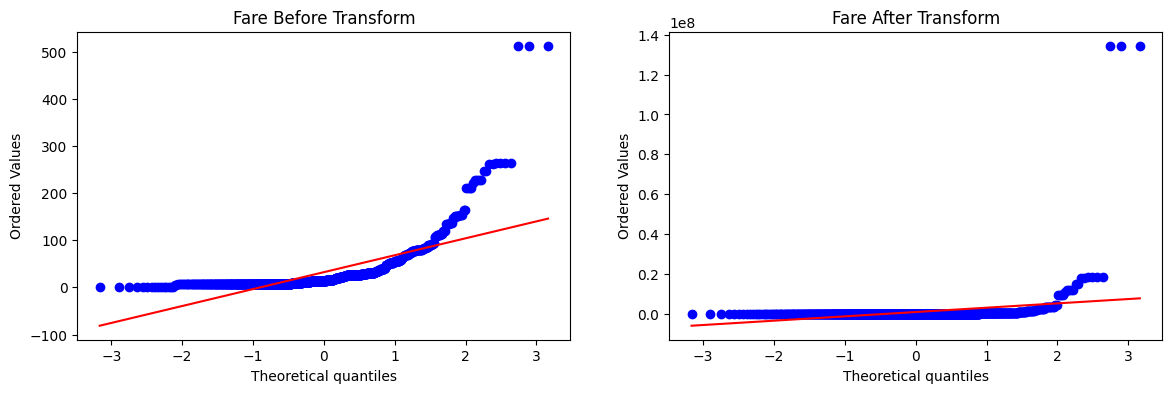

In [31]:
apply_transform(lambda x:x**3)

Accuracy 0.6589013732833957


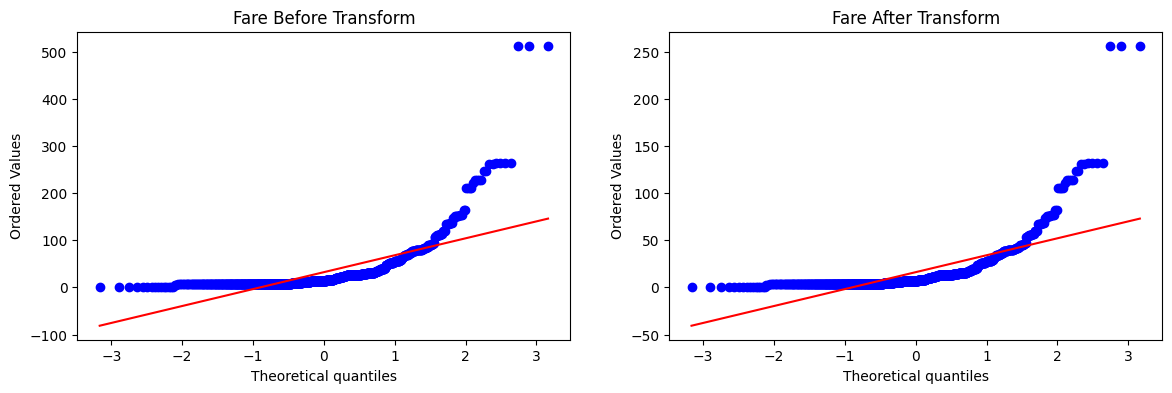

In [33]:
apply_transform(lambda x:x**1/2)

Accuracy 0.61729088639201


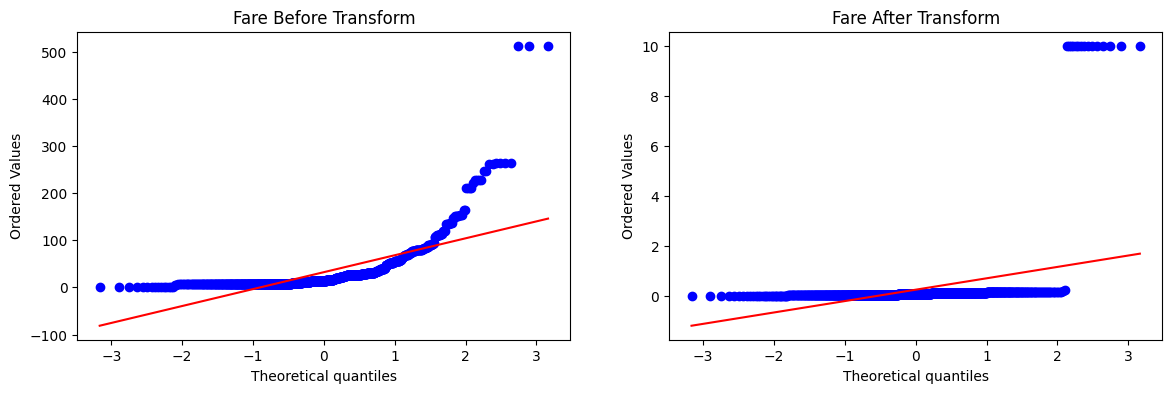

In [34]:
apply_transform(lambda x:1/(x+0.1))